In [47]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
#from sklearn import linear_model

In [48]:
#Number of vertical and horizontal corners
nb_vertical = 9
nb_horizontal = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_left = [] # 2d points in image plane.

images = glob.glob('imgs/left*.png')
assert images


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    #findChessboardCorners here
    ret, corners = cv2.findChessboardCorners(gray,(nb_vertical,nb_horizontal))


    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints_left.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        #cv2.waitKey(500)

cv2.destroyAllWindows()

In [49]:
#Number of vertical and horizontal corners
nb_vertical = 9
nb_horizontal = 6

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((nb_horizontal*nb_vertical,3), np.float32)
objp[:,:2] = np.mgrid[0:nb_vertical,0:nb_horizontal].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints_right = [] # 2d points in image plane.

images = glob.glob('imgs/right*.png')
assert images


for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


    #findChessboardCorners here
    ret, corners = cv2.findChessboardCorners(gray,(nb_vertical,nb_horizontal))


    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        imgpoints_right.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (nb_vertical,nb_horizontal), corners,ret)
        cv2.imshow('img',img)
        #cv2.waitKey(500)

cv2.destroyAllWindows()

In [50]:
ret, mtx, D1, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints_left, gray.shape[::-1], None, None)
img_left = cv2.imread('imgs/left-0000.png')
h,  w = img_left.shape[:2]
K1, roi = cv2.getOptimalNewCameraMatrix(mtx,D1,(w,h),1,(w,h))

In [51]:
ret, mtx, D2, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints_right, gray.shape[::-1], None, None)
img_right = cv2.imread('imgs/right-0000.png')
h,  w = img_right.shape[:2]
K2, roi = cv2.getOptimalNewCameraMatrix(mtx,D2,(w,h),1,(w,h))

In [ ]:
ret,K1,D1,K2,D2,R,T,E,F = cv2.stereoCalibrate(objpoints,imgpoints_left,imgpoints_right,K1,D1,K2,D2,(w,h))


[[365.89266968   0.         324.62721633]
 [  0.         366.50601196 247.47156052]
 [  0.           0.           1.        ]]
[[-2.72787908e-05 -6.13625083e-02 -4.01221217e-03]
 [ 5.54944171e-02 -6.99038291e-03  1.47446711e+00]
 [ 2.71066567e-03 -1.47423626e+00 -6.93632989e-03]]


Rectify

In [52]:
print(F)
R1,R2,P1,P2,Q,roi_left,roi_right = cv2.stereoRectify(K1,D1,K2,D2,(w,h),R,T)

[[-1.40839457e-06 -3.16282335e-03  7.07371684e-01]
 [ 2.86035910e-03 -3.59703644e-04  2.69678455e+01]
 [-6.51237214e-01 -2.68713056e+01  1.00000000e+00]]


In [53]:
leftMapX, leftMapY = cv2.initUndistortRectifyMap(K1,D1,R1,P1,(w,h),cv2.CV_32FC1)
left_rectified = cv2.remap(img_left,leftMapX,leftMapY,cv2.INTER_LINEAR, cv2.BORDER_CONSTANT)

rightMapX, rightMapY = cv2.initUndistortRectifyMap(K2,D2,R2,P2,(w,h),cv2.CV_32FC1)
right_rectified = cv2.remap(img_right,rightMapX,rightMapY,cv2.INTER_LINEAR, cv2.BORDER_CONSTANT)

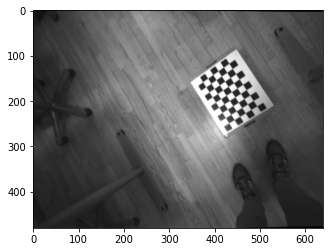

In [54]:
plt.imshow(left_rectified)
